In [3]:
import numpy as np
import pandas as pd 
import sklearn
import seaborn as sb
import matplotlib.pyplot as plt

In [4]:
import pandas as pd
df=pd.read_csv("Skyserver.csv")
df.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


In [5]:
df.shape

(10000, 18)

In [6]:
df.columns

Index(['objid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'rerun', 'camcol',
       'field', 'specobjid', 'class', 'redshift', 'plate', 'mjd', 'fiberid'],
      dtype='object')

In [7]:
#Columns with Int64 DataType
df.select_dtypes(include=['int64']).columns


Index(['run', 'rerun', 'camcol', 'field', 'plate', 'mjd', 'fiberid'], dtype='object')

In [8]:
#Columns with Object DataType
df.select_dtypes(include=['object']).columns

Index(['class'], dtype='object')

In [9]:
#Columns with float DataType
df.select_dtypes(include=['float']).columns

Index(['objid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'specobjid', 'redshift'], dtype='object')

In [10]:
df.dtypes

objid        float64
ra           float64
dec          float64
u            float64
g            float64
r            float64
i            float64
z            float64
run            int64
rerun          int64
camcol         int64
field          int64
specobjid    float64
class         object
redshift     float64
plate          int64
mjd            int64
fiberid        int64
dtype: object

In [11]:
#Checking Presence of NaN Values
df.isnull().values.any()

False

In [12]:
df.isnull().sum()

objid        0
ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
rerun        0
camcol       0
field        0
specobjid    0
class        0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64

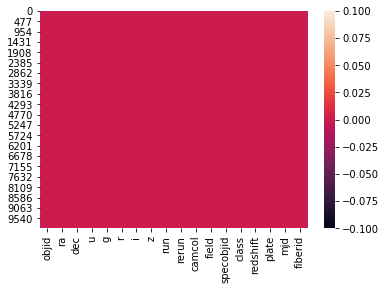

In [13]:
sb.heatmap(df.isnull())

In [14]:
dfcor=df.corr()
dfcor

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid
objid,1.000000e+00,2.524419e-14,-1.937483e-15,5.581214e-14,1.001149e-13,2.995673e-14,2.212198e-14,-4.107700e-14,-1.553011e-14,NaN,1.921887e-15,5.938881e-16,-1.829075e-15,5.085882e-16,4.156934e-16,-3.317582e-15,4.665195e-15
ra,2.524419e-14,1.000000e+00,3.596046e-03,3.123756e-02,4.390863e-02,4.710290e-02,4.573107e-02,4.294957e-02,-9.274056e-02,NaN,-6.293831e-03,5.946996e-01,-9.532711e-02,3.030740e-02,-9.532933e-02,-8.688726e-02,5.748482e-02
dec,-1.937483e-15,3.596046e-03,1.000000e+00,3.527932e-02,6.187471e-02,6.340395e-02,5.829189e-02,5.687030e-02,7.783849e-01,NaN,1.146139e-01,-1.314714e-01,8.834533e-02,6.702076e-02,8.834153e-02,6.614663e-02,1.550124e-01
u,5.581214e-14,3.123756e-02,3.527932e-02,1.000000e+00,8.492320e-01,6.923790e-01,6.026302e-01,5.514828e-01,3.822910e-02,NaN,9.944672e-03,8.547880e-03,-1.294293e-01,1.637409e-01,-1.294304e-01,-1.687927e-01,1.130112e-02
g,1.001149e-13,4.390863e-02,6.187471e-02,8.492320e-01,1.000000e+00,9.581062e-01,9.074187e-01,8.796222e-01,5.844630e-02,NaN,1.022304e-02,1.465110e-02,-5.497908e-02,4.075763e-01,-5.498078e-02,-9.277155e-02,4.718739e-02
r,2.995673e-14,4.710290e-02,6.340395e-02,6.923790e-01,9.581062e-01,1.000000e+00,9.776718e-01,9.691967e-01,5.726060e-02,NaN,1.074725e-02,1.713294e-02,1.978831e-02,4.410797e-01,1.978671e-02,-9.344506e-03,6.108141e-02
i,2.212198e-14,4.573107e-02,5.829189e-02,6.026302e-01,9.074187e-01,9.776718e-01,1.000000e+00,9.815066e-01,4.976478e-02,NaN,1.346079e-02,1.978147e-02,7.295994e-02,4.314500e-01,7.295843e-02,5.089616e-02,6.997739e-02
z,-4.107700e-14,4.294957e-02,5.687030e-02,5.514828e-01,8.796222e-01,9.691967e-01,9.815066e-01,1.000000e+00,4.825225e-02,NaN,1.092981e-02,1.824845e-02,1.123981e-01,4.240342e-01,1.123969e-01,9.565845e-02,6.797999e-02
run,-1.553011e-14,-9.274056e-02,7.783849e-01,3.822910e-02,5.844630e-02,5.726060e-02,4.976478e-02,4.825225e-02,1.000000e+00,NaN,1.518143e-01,-4.638975e-01,9.360436e-02,5.905595e-02,9.360107e-02,7.035433e-02,1.385659e-01
rerun,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
df.describe()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.237650e+18,175.529987,14.836148,18.619355,17.371931,16.840963,16.583579,16.422833,981.034800,301.0,3.648700,302.380100,1.645022e+18,0.143726,1460.986400,52943.533300,353.069400
std,1.577039e+05,47.783439,25.212207,0.828656,0.945457,1.067764,1.141805,1.203188,273.305024,0.0,1.666183,162.577763,2.013998e+18,0.388774,1788.778371,1511.150651,206.298149
min,1.237650e+18,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,308.000000,301.0,1.000000,11.000000,2.995780e+17,-0.004136,266.000000,51578.000000,1.000000
25%,1.237650e+18,157.370946,-0.539035,18.178035,16.815100,16.173333,15.853705,15.618285,752.000000,301.0,2.000000,184.000000,3.389248e+17,0.000081,301.000000,51900.000000,186.750000
50%,1.237650e+18,180.394514,0.404166,18.853095,17.495135,16.858770,16.554985,16.389945,756.000000,301.0,4.000000,299.000000,4.966580e+17,0.042591,441.000000,51997.000000,351.000000
75%,1.237650e+18,201.547279,35.649397,19.259232,18.010145,17.512675,17.258550,17.141447,1331.000000,301.0,5.000000,414.000000,2.881300e+18,0.092579,2559.000000,54468.000000,510.000000
max,1.237650e+18,260.884382,68.542265,19.599900,19.918970,24.802040,28.179630,22.833060,1412.000000,301.0,6.000000,768.000000,9.468830e+18,5.353854,8410.000000,57481.000000,1000.000000


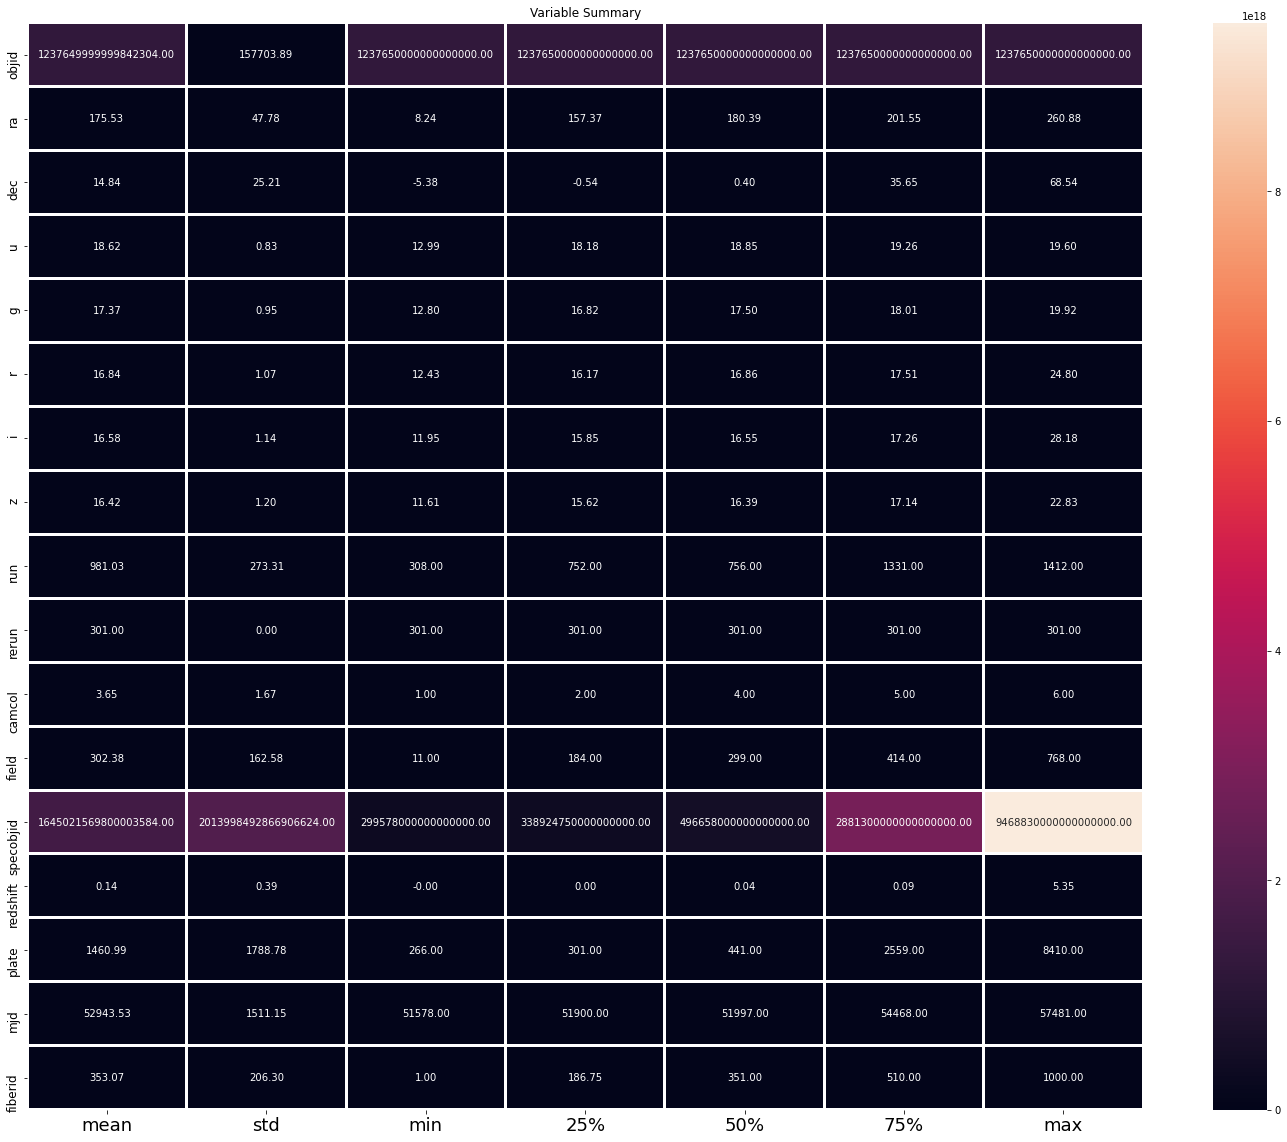

In [16]:
plt.figure(figsize=(25,20))
sb.heatmap(round(df.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt=".2f")
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.title("Variable Summary")
plt.show()

UniVaiant Analysis

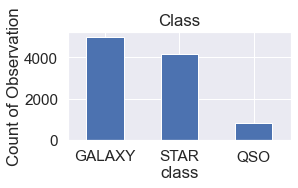

In [17]:
sb.set(font_scale=1.4)
df['class'].value_counts().plot(kind='bar', figsize=(4,2), rot=0)
plt.xlabel("class", labelpad=2)
plt.ylabel("Count of Observation", labelpad=2)
plt.title("Class", y=1);

Galaxy has more no of observation than followed by star and QSO is least among all in the class column

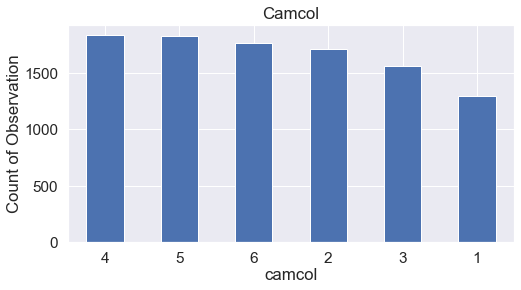

In [18]:
sb.set(font_scale=1.4)
df['camcol'].value_counts().plot(kind='bar', figsize=(8,4), rot=0)
plt.xlabel("camcol", labelpad=2)
plt.ylabel("Count of Observation", labelpad=2)
plt.title("Camcol", y=1);

4,5 are having high freqancy when compare with other en coded values

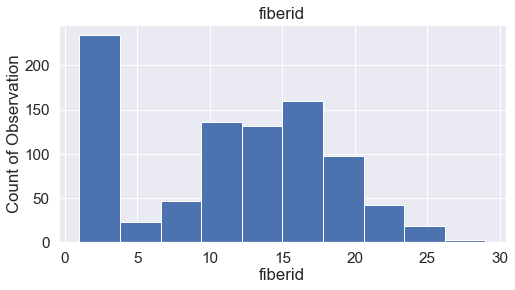

In [19]:
sb.set(font_scale=1.4)
df['fiberid'].value_counts().plot(kind='hist', figsize=(8,4), rot=0)
plt.xlabel("fiberid", labelpad=2)
plt.ylabel("Count of Observation", labelpad=2)
plt.title("fiberid", y=1);

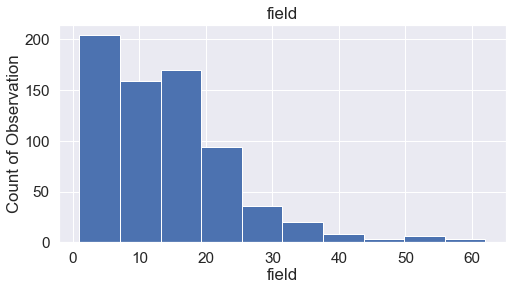

In [20]:
sb.set(font_scale=1.4)
df['field'].value_counts().plot(kind='hist', figsize=(8,4), rot=0)
plt.xlabel("field", labelpad=2)
plt.ylabel("Count of Observation", labelpad=2)
plt.title("field", y=1);

Range between 0 -20 lies the maximum observation

Bi Variant Correlation

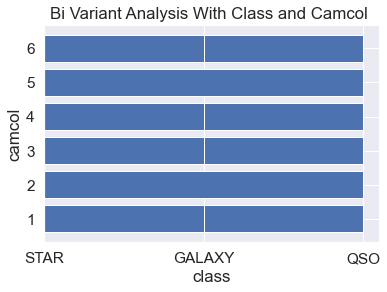

In [21]:
plt.barh(df["camcol"],df['class'])
plt.title("Bi Variant Analysis With Class and Camcol ")
plt.ylabel('camcol')
plt.xlabel('class')
plt.show()

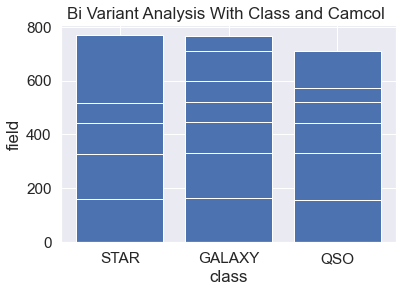

In [22]:
plt.bar(df["class"],df['field'])
plt.title("Bi Variant Analysis With Class and Camcol ")
plt.ylabel('field')
plt.xlabel('class')
plt.show()

Multi Variant Analysis - Correlation

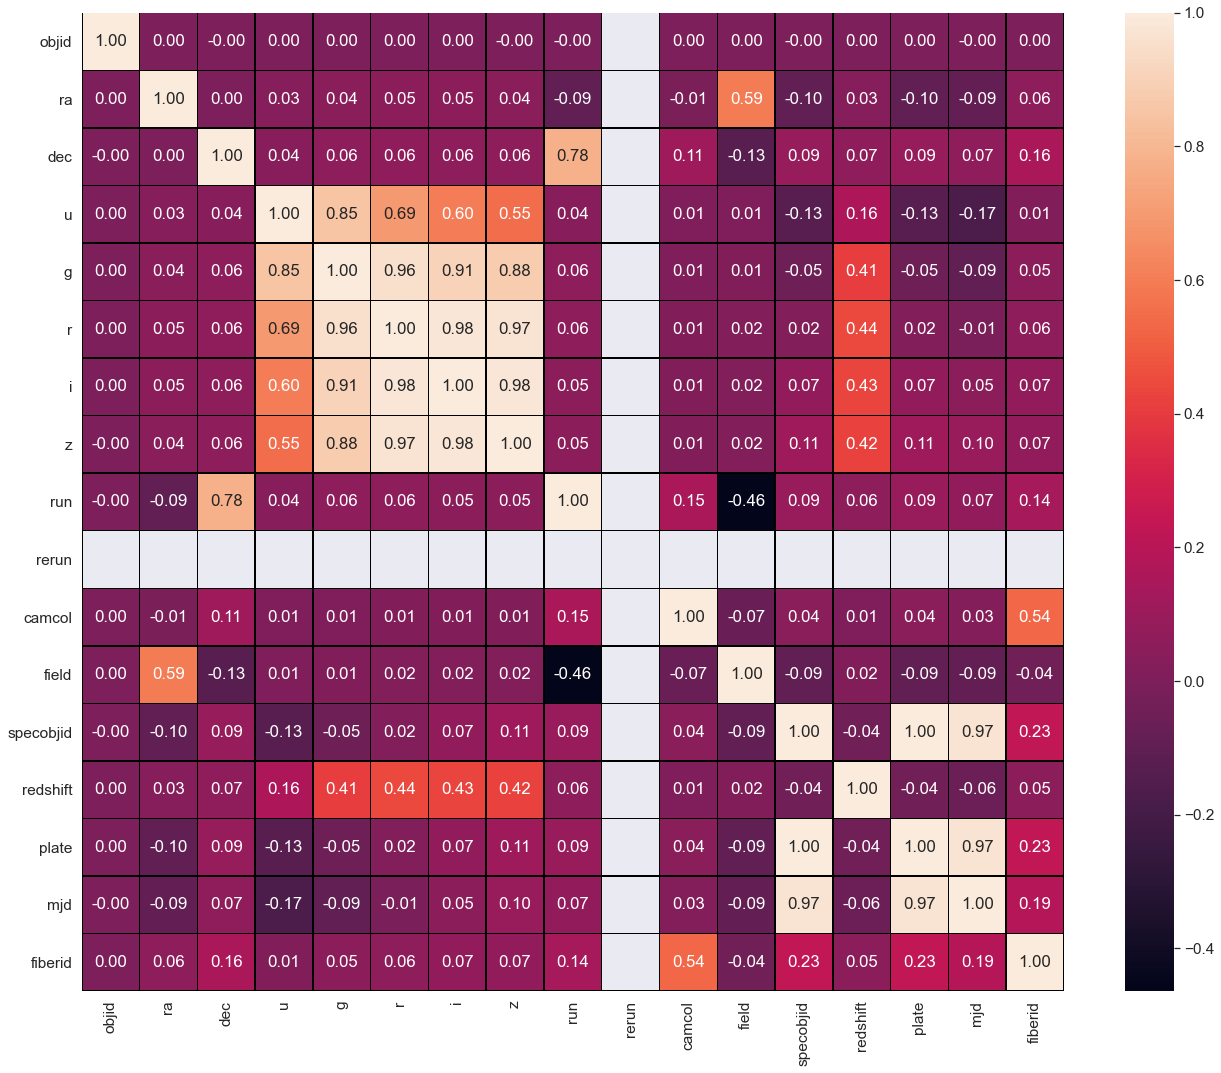

In [23]:
corr=df.corr()
plt.figure(figsize=(22,18))
sb.heatmap(corr,annot=True,linewidths=.5,linecolor="black",fmt=".2f")
plt.show()

their is a positive correlation u, g, r, i, z and reshift is having correlation with u, g, r, i, z Columns

Data Modeling

In [24]:
x = df.iloc[:,1:8]
x

,ra,dec,u,g,r,i,z
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531
1,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326
...,...,...,...,...,...,...,...
9995,131.316413,51.539547,18.81777,17.47053,16.91508,16.68305,16.50570
9996,131.306083,51.671341,18.27255,17.43849,17.07692,16.71661,16.69897
9997,131.552562,51.666986,18.75818,17.77784,17.51872,17.43302,17.42048
9998,131.477151,51.753068,18.88287,17.91068,17.53152,17.36284,17.13988


In [25]:
x1=df.iloc[:,14]
x1

0      -0.000009
1      -0.000055
2       0.123111
3      -0.000111
4       0.000590
          ...   
9995    0.027583
9996    0.117772
9997   -0.000402
9998    0.014019
9999    0.118417
Name: redshift, Length: 10000, dtype: float64

In [26]:
x = pd.DataFrame(df, columns = ['ra','dec','u','g','r','i','z','redshift'])



In [27]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['class']=le.fit_transform(df['class'].astype(str))
y = pd.DataFrame(df, columns = ['class'])
y

,class
0,2
1,2
2,0
3,2
4,2
...,...
9995,0
9996,0
9997,2
9998,0


In [28]:
from sklearn.linear_model import LogisticRegression as lg
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')

In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)
model=lg()
model.fit(x_train,y_train)

LogisticRegression()

In [30]:
pred=model.predict(x_test)
print(pred) 

[0 1 2 ... 2 2 0]


In [31]:
print ("Accuracy Score:",round(accuracy_score(y_test,pred),2),'\n')
print ("Confusion Matrix:","\n","\n",confusion_matrix(y_test,pred),'\n')
print ("Classification Report:","\n","\n",classification_report(y_test,pred))

Accuracy Score: 0.85 

Confusion Matrix: 
 
 [[836   1 159]
 [ 20 167   3]
 [102  21 691]] 

Classification Report: 
 
               precision    recall  f1-score   support

           0       0.87      0.84      0.86       996
           1       0.88      0.88      0.88       190
           2       0.81      0.85      0.83       814

    accuracy                           0.85      2000
   macro avg       0.86      0.86      0.86      2000
weighted avg       0.85      0.85      0.85      2000



Data Analysis

In [32]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

def svmkernel(ker):
    svc=SVC(kernel='poly')
    svc.fit(x_train,y_train)
    svc.score(x_train,y_train)
    predsvc=svc.predict(x_test)
    print('Accuracy Score:',round(accuracy_score(y_test,predsvc),2),'\t')
    print('\n','Confusion Matrix:','\n','\n',confusion_matrix(y_test,predsvc))
    print('\n','Classification Report:','\n','\n',classification_report(y_test,predsvc))

In [33]:
svmkernel("poly")

Accuracy Score: 0.53 	

 Confusion Matrix: 
 
 [[989   0   7]
 [149   0  41]
 [752   0  62]]

 Classification Report: 
 
               precision    recall  f1-score   support

           0       0.52      0.99      0.69       996
           1       0.00      0.00      0.00       190
           2       0.56      0.08      0.13       814

    accuracy                           0.53      2000
   macro avg       0.36      0.36      0.27      2000
weighted avg       0.49      0.53      0.40      2000



In [34]:
svmkernel("rbf")

Accuracy Score: 0.53 	

 Confusion Matrix: 
 
 [[989   0   7]
 [149   0  41]
 [752   0  62]]

 Classification Report: 
 
               precision    recall  f1-score   support

           0       0.52      0.99      0.69       996
           1       0.00      0.00      0.00       190
           2       0.56      0.08      0.13       814

    accuracy                           0.53      2000
   macro avg       0.36      0.36      0.27      2000
weighted avg       0.49      0.53      0.40      2000



In [35]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print('Accuracy Score:',round(accuracy_score(y_test,preddtc),2),'\t')
print('\n','Confusion Matrix:','\n','\n',confusion_matrix(y_test,preddtc))
print('\n','Classification Report:','\n','\n',classification_report(y_test,preddtc))

Accuracy Score: 0.98 	

 Confusion Matrix: 
 
 [[988   7   1]
 [ 15 175   0]
 [  5   2 807]]

 Classification Report: 
 
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       996
           1       0.95      0.92      0.94       190
           2       1.00      0.99      1.00       814

    accuracy                           0.98      2000
   macro avg       0.98      0.97      0.97      2000
weighted avg       0.98      0.98      0.98      2000



In [36]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
predknn=knn.predict(x_test)
print('Accuracy Score:',round(accuracy_score(y_test,predknn),2),'\t')
print('\n','Confusion Matrix:','\n','\n',confusion_matrix(y_test,predknn))
print('\n','Classification Report:','\n','\n',classification_report(y_test,predknn))

Accuracy Score: 0.78 	

 Confusion Matrix: 
 
 [[813   6 177]
 [ 22 134  34]
 [192  19 603]]

 Classification Report: 
 
               precision    recall  f1-score   support

           0       0.79      0.82      0.80       996
           1       0.84      0.71      0.77       190
           2       0.74      0.74      0.74       814

    accuracy                           0.78      2000
   macro avg       0.79      0.75      0.77      2000
weighted avg       0.78      0.78      0.77      2000



In [37]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
rfc.score(x_train,y_train)
predrfc=rfc.predict(x_test)
print('Accuracy Score:',round(accuracy_score(y_test,predrfc),2),'\t')
print('\n','Confusion Matrix:','\n','\n',confusion_matrix(y_test,predrfc))
print('\n','Classification Report:','\n','\n',classification_report(y_test,predrfc))


Accuracy Score: 0.99 	

 Confusion Matrix: 
 
 [[987   3   6]
 [  9 181   0]
 [  0   0 814]]

 Classification Report: 
 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       996
           1       0.98      0.95      0.97       190
           2       0.99      1.00      1.00       814

    accuracy                           0.99      2000
   macro avg       0.99      0.98      0.99      2000
weighted avg       0.99      0.99      0.99      2000



RandomForestClassifier is having the 99% Accuracy towards DataSet. This is the best out come when compare with other models

In [38]:
import numpy as np
a=np.array(y_test)
a

array([[0],
       [1],
       [0],
       ...,
       [2],
       [2],
       [0]])

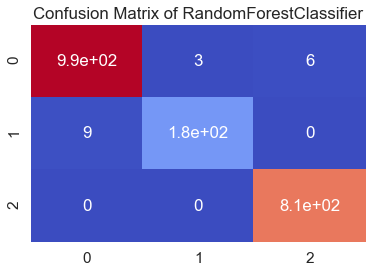

In [43]:
cm = confusion_matrix(y_test,predrfc)
sb.heatmap(cm,annot=True,cbar=False,cmap='coolwarm')
plt.title('Confusion Matrix of RandomForestClassifier')
plt.show()

In [45]:
import pickle
filename='sky_Project6.pkl'
pickle.dump(rfc,open(filename,'wb'))